In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, SimpleRNN, LSTM, GRU,
                                     Bidirectional, Dense, Dropout)

Loading the Dataset

In [ ]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Exploratory Data Analysis

In [ ]:
print("\nShape of the Dataset (rows, columns):")
print(df.shape)

print("\n Features (Column Names):")
print(df.columns.tolist())

print(df.info())

print("\n Null Values in Each Column:")
print(df.isnull().sum())

print("\nCount of Each Sentiment Class:")
print(df['sentiment'].value_counts())



Shape of the Dataset (rows, columns):
(50000, 2)

 Features (Column Names):
['review', 'sentiment']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

 Null Values in Each Column:
review       0
sentiment    0
dtype: int64

Count of Each Sentiment Class:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Sentiment Analysis

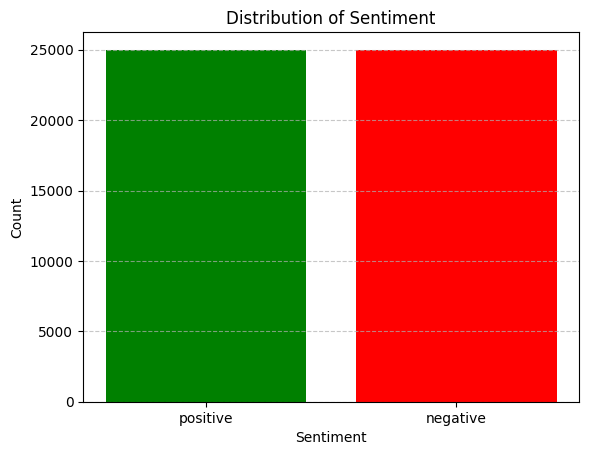

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plot distribution of review lenghts

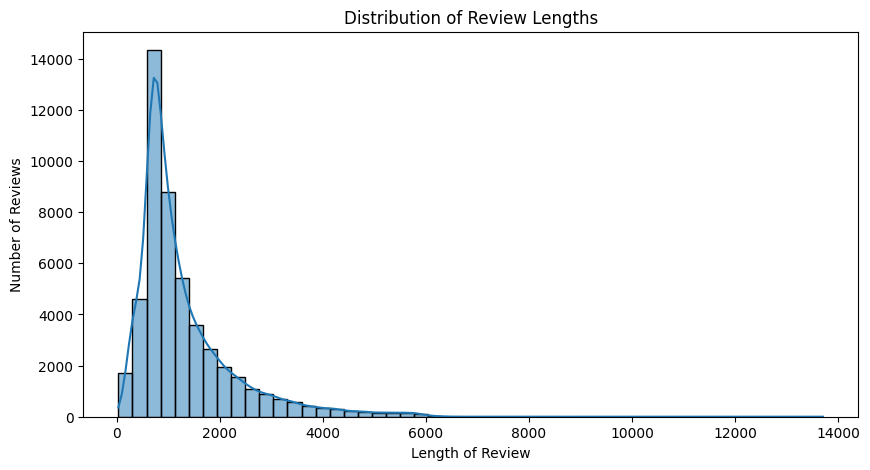

In [ ]:
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review")
plt.ylabel("Number of Reviews")
plt.show()


# Steps:-

Padding

Tokenization

Review Length Before and after padding

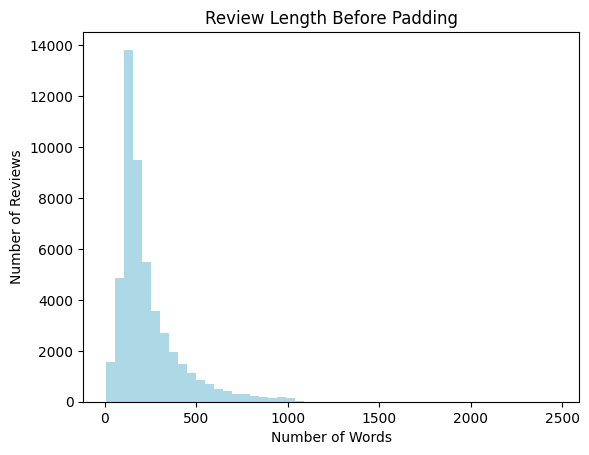

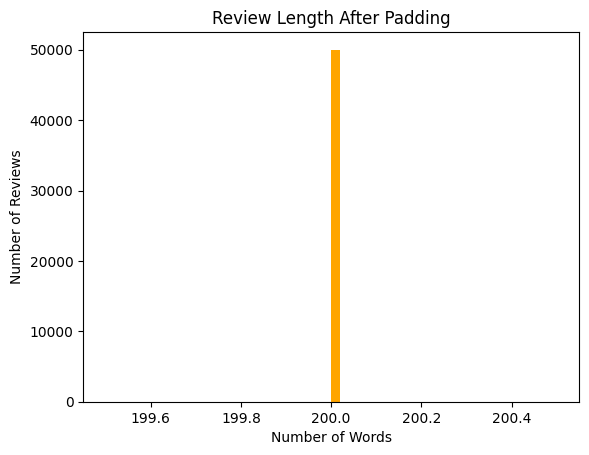

In [ ]:
# Step 1: Review length before padding (count words)
df['review_length_before'] = df['review'].apply(lambda x: len(x.split()))

# Show before padding review length graph
plt.hist(df['review_length_before'], bins=50, color='lightblue')
plt.title("Review Length Before Padding")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

# Step 2: Tokenize
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])

# Step 3: Padding
padded = pad_sequences(sequences, maxlen=200)

# Step 4: Review length after padding
review_length_after = [len(i) for i in padded]

# Show after padding review length graph
plt.hist(review_length_after, bins=50, color='orange')
plt.title("Review Length After Padding")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

Cleaning of review texts

In [ ]:
import re

def clean_text(text):
    print("Original Text:")
    print(text)

    # Convert to lowercase
    text = text.lower()
    print("\n After Lowercasing:")
    print(text)

    # Remove <br> and <br/> tags
    text = re.sub(r"<br\s*/?>", " ", text)
    print("\n After Removing <br> Tags:")
    print(text)

    # Remove everything except letters and apostrophes
    text = re.sub(r"[^a-zA-Z']", " ", text)
    print("\n After Removing Non-Alphabets (keeping a-z and apostrophes):")
    print(text)

    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text)
    print("\n After Removing Extra Spaces:")
    print(text)

    # Final cleaned text
    cleaned = text.strip()
    print("\nFinal Cleaned Text:")
    print(cleaned)

    return cleaned


sample_review = "Awesome MOVIE!! <br> Loved it 100%! I can't wait to see it again!!!"
clean_text(sample_review)


Original Text:
Awesome MOVIE!! <br> Loved it 100%! I can't wait to see it again!!!

 After Lowercasing:
awesome movie!! <br> loved it 100%! i can't wait to see it again!!!

 After Removing <br> Tags:
awesome movie!!   loved it 100%! i can't wait to see it again!!!

 After Removing Non-Alphabets (keeping a-z and apostrophes):
awesome movie     loved it       i can't wait to see it again   

 After Removing Extra Spaces:
awesome movie loved it i can't wait to see it again 

Final Cleaned Text:
awesome movie loved it i can't wait to see it again


"awesome movie loved it i can't wait to see it again"

In [ ]:

df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

Streaming output truncated to the last 5000 lines.
Final Cleaned Text:
in a year of pretentious muck like synecdoche new york a film born out of charlie kaufman's own self indulgence comes a film that is similarly hard to watch but about three times as important frownland is a labor of love by the crew the actors and the filmmaker shot over years by friends it traces a man who cannot communicate through his thoroughly authentic real brooklyn world the people that you see are a step beyond even the stylization of the mumblecore movement they are real people painfully trapped in their own self contained neuroses unwilling to change unable the real world to them is their own set of delusions and because this is a film about people who are so profoundly out of touch it is very difficult to watch it is mm film making without proper light money or any of the other factors that would make a film slick but its honesty can not be understated a fact that would cause a room full of people to dism

Train-Test Split

In [ ]:
X = df['clean_review'].values
y = df['label'].values
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tokenization

Padding

Label Encoding

In [ ]:
# Step 2: Tokenization
from sklearn.preprocessing import LabelEncoder
vocab_size = 10000
maxlen = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Step 3: Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

# Step 4: Encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

Batch Training

In [ ]:
batch_size = 32

# Training set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_pad, y_train_enc))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size)

# Test set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_pad, y_test_enc))
test_dataset = test_dataset.batch(batch_size)

# Preview one batch
for batch_x, batch_y in train_dataset.take(1):
    print(" Batch X shape:", batch_x.shape)  # (32, 200)
    print("Batch Y shape:", batch_y.shape)  # (32,)
    print("Example review (as padded token indices):", batch_x[0].numpy())
    print("Example label:", batch_y[0].numpy())

 Batch X shape: (32, 200)
Batch Y shape: (32,)
Example review (as padded token indices): [  11    7   27    5   56  518  445    1    3   10   25  105   92   29
   14  672 8119    7   24 1276  546   14    2    1  445    1 5746 9164
  307    4 6297 8109 3920    1    2  672  753 2094    7  177  154  133
    3   46   23  736    5 3423   20  933    6  173   32  754   44  707
 1765    3  245    2    1  149   25  177    2  166 4964   14 1652    1
    2  672  331  466    8  132    1   18  239 4086    1    1    7   20
 1732    3  136   28 2509    8    4 2488 1409   24  409   23  154   21
    1    6   24 1746    3   28  157 3125    2  254    8   24 1395   55
   20  260    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

Reverse Word Index

In [ ]:
# Get reverse word index
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

# Convert back one example (e.g., first review in batch)
example_tokens = batch_x[0].numpy()
decoded_review = ' '.join([reverse_word_index.get(i, '<PAD>') for i in example_tokens if i != 0])

print("\n🗣️ Decoded review:")
print(decoded_review)


🗣️ Decoded review:
this is one of my favorite mr <OOV> and i have seen them all as usual lorre is his charming self as the <OOV> mr <OOV> lionel atwill plays a delightfully zany museum <OOV> the usual comic relief is quite funny here and there are lots of suspects on whom to cast an eye it's fast paced and fun the <OOV> doesn't have quite the same flair as thomas <OOV> the usual second lead in these <OOV> but he's adequate <OOV> <OOV> is on board and while he speaks in a stereotypical manner his lines are funny not <OOV> to his intelligence and he actually saves the day in his brief time on screen


Building RNN Model

In [ ]:
def create_rnn_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(SimpleRNN(64))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Train RNN Model

In [ ]:
model_rnn = create_rnn_model()
history_rnn = model_rnn.fit(
    X_train_pad,
    y_train_enc,
    epochs=8,
    batch_size=64,
    validation_data=(X_test_pad, y_test_enc),
    verbose=2
)

model_rnn.save("rnn_imdb_model.keras")

Epoch 1/8
625/625 - 65s - 104ms/step - accuracy: 0.5065 - loss: 0.7161 - val_accuracy: 0.5090 - val_loss: 0.6956
Epoch 2/8
625/625 - 76s - 121ms/step - accuracy: 0.5035 - loss: 0.6996 - val_accuracy: 0.5019 - val_loss: 0.6931
Epoch 3/8
625/625 - 78s - 125ms/step - accuracy: 0.5057 - loss: 0.6941 - val_accuracy: 0.4883 - val_loss: 0.6956
Epoch 4/8
625/625 - 76s - 122ms/step - accuracy: 0.5196 - loss: 0.6915 - val_accuracy: 0.5069 - val_loss: 0.6935
Epoch 5/8
625/625 - 64s - 102ms/step - accuracy: 0.5404 - loss: 0.6843 - val_accuracy: 0.5099 - val_loss: 0.6990
Epoch 6/8
625/625 - 109s - 175ms/step - accuracy: 0.5615 - loss: 0.6694 - val_accuracy: 0.5166 - val_loss: 0.6975
Epoch 7/8
625/625 - 78s - 124ms/step - accuracy: 0.5900 - loss: 0.6490 - val_accuracy: 0.6406 - val_loss: 0.6312
Epoch 8/8
625/625 - 74s - 119ms/step - accuracy: 0.6120 - loss: 0.6297 - val_accuracy: 0.5472 - val_loss: 0.6945


Plot Of Accuracy

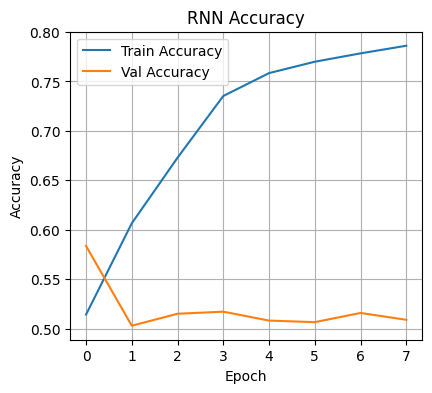

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


Plot of Loss

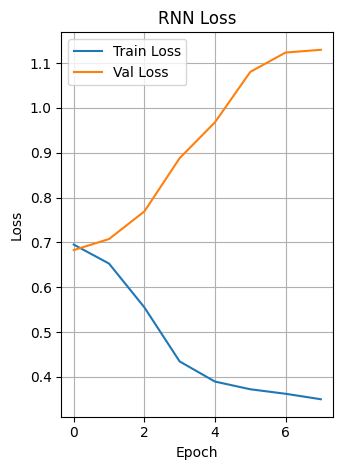

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title('RNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("rnn_training_curves.png")
plt.show()


Evaluation Metrics For RNN

In [ ]:
y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")
print("--- RNN Model Classification Report ---")
print(classification_report(y_test, y_pred_rnn))

print("✅ RNN model completed: trained, evaluated, and visualized successfully.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
--- RNN Model Classification Report ---
              precision    recall  f1-score   support

           0       0.50      0.64      0.57      4961
           1       0.52      0.38      0.44      5039

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000

✅ RNN model completed: trained, evaluated, and visualized successfully.


Building LSTM Model

In [ ]:
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Training LSTM

In [ ]:
model_lstm = create_lstm_model()
history_lstm = model_lstm.fit(
    X_train_pad,
    y_train_enc,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_enc),
    verbose=2
)

model_lstm.save("lstm_imdb_model.keras")

Epoch 1/5
625/625 - 154s - 247ms/step - accuracy: 0.5293 - loss: 0.6899 - val_accuracy: 0.6381 - val_loss: 0.6544
Epoch 2/5
625/625 - 193s - 309ms/step - accuracy: 0.5710 - loss: 0.6719 - val_accuracy: 0.5797 - val_loss: 0.6653
Epoch 3/5
625/625 - 141s - 225ms/step - accuracy: 0.6191 - loss: 0.6356 - val_accuracy: 0.7263 - val_loss: 0.5641
Epoch 4/5
625/625 - 140s - 224ms/step - accuracy: 0.6786 - loss: 0.6038 - val_accuracy: 0.8167 - val_loss: 0.4423
Epoch 5/5
625/625 - 142s - 228ms/step - accuracy: 0.8501 - loss: 0.3789 - val_accuracy: 0.8560 - val_loss: 0.3404


Accuracy Plots

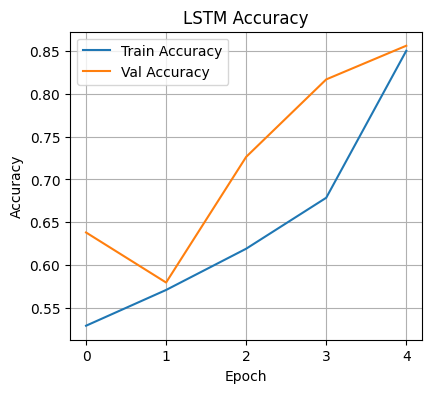

In [ ]:
plt.figure(figsize=(10, 4))

#
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss Plot

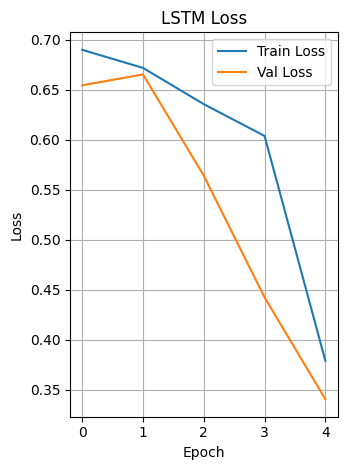

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("lstm_training_curves.png")
plt.show()

Evaluation Metrics For LSTM

In [ ]:
y_pred_lstm = (model_lstm.predict(X_test_pad) > 0.5).astype("int32")
print("--- LSTM Model Classification Report ---")
print(classification_report(y_test_enc, y_pred_lstm))

print(" LSTM model completed: trained, evaluated, and visualized successfully.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
--- LSTM Model Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

 LSTM model completed: trained, evaluated, and visualized successfully.


Building GRU Model

In [ ]:
def create_gru_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Training GRU Model

In [ ]:
model_gru = create_gru_model()
history_gru = model_gru.fit(
    X_train_pad,
    y_train_enc,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_enc),
    verbose=2
)

model_gru.save("gru_imdb_model.keras")

Epoch 1/5
625/625 - 150s - 241ms/step - accuracy: 0.5210 - loss: 0.6921 - val_accuracy: 0.5199 - val_loss: 0.6915
Epoch 2/5
625/625 - 148s - 237ms/step - accuracy: 0.6499 - loss: 0.5951 - val_accuracy: 0.8516 - val_loss: 0.3473
Epoch 3/5
625/625 - 202s - 323ms/step - accuracy: 0.8860 - loss: 0.2915 - val_accuracy: 0.8757 - val_loss: 0.2942
Epoch 4/5
625/625 - 222s - 356ms/step - accuracy: 0.9270 - loss: 0.2027 - val_accuracy: 0.8774 - val_loss: 0.3090
Epoch 5/5
625/625 - 181s - 290ms/step - accuracy: 0.9535 - loss: 0.1390 - val_accuracy: 0.8714 - val_loss: 0.3445


Accuracy Plot

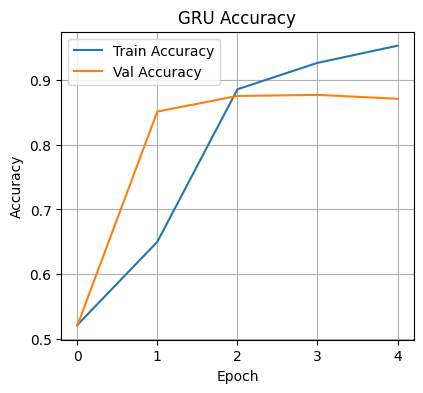

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss Plot

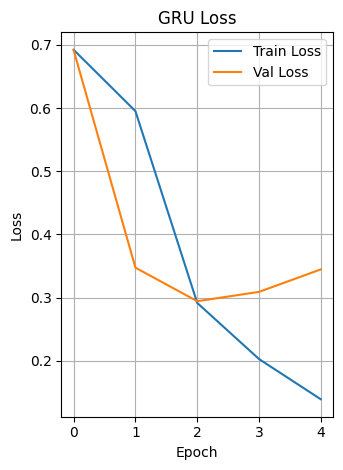

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("gru_training_curves.png")
plt.show()

Evaluation Metrics For GRU

In [ ]:
y_pred_gru = (model_gru.predict(X_test_pad) > 0.5).astype("int32")
print("--- GRU Model Classification Report ---")
print(classification_report(y_test_enc, y_pred_gru))

print("✅ GRU model completed: trained, evaluated, and visualized successfully.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
--- GRU Model Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      4961
           1       0.85      0.90      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

✅ GRU model completed: trained, evaluated, and visualized successfully.


Building Bidirectional GRU Model

In [ ]:
def create_bidirectional_gru_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(Bidirectional(GRU(64)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Training Bidirectional GRU

In [ ]:
# ---------------- Step 5: Train the Bidirectional GRU Model ----------------
model_bi_gru = create_bidirectional_gru_model()
history_bi_gru = model_bi_gru.fit(
    X_train_pad,
    y_train_enc,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_enc),
    verbose=2
)

model_bi_gru.save("bi_gru_imdb_model.keras")

Epoch 1/5
625/625 - 285s - 456ms/step - accuracy: 0.7693 - loss: 0.4706 - val_accuracy: 0.8583 - val_loss: 0.3416
Epoch 2/5
625/625 - 323s - 516ms/step - accuracy: 0.8891 - loss: 0.2817 - val_accuracy: 0.8788 - val_loss: 0.2961
Epoch 3/5
625/625 - 323s - 516ms/step - accuracy: 0.9234 - loss: 0.2094 - val_accuracy: 0.8809 - val_loss: 0.3107
Epoch 4/5
625/625 - 321s - 513ms/step - accuracy: 0.9514 - loss: 0.1440 - val_accuracy: 0.8645 - val_loss: 0.3578
Epoch 5/5
625/625 - 319s - 511ms/step - accuracy: 0.9714 - loss: 0.0913 - val_accuracy: 0.8699 - val_loss: 0.4509


Accuracy Plot

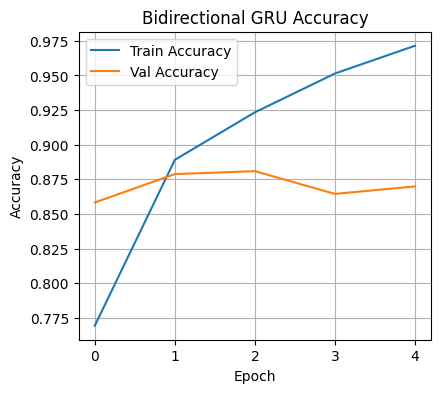

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bi_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_bi_gru.history['val_accuracy'], label='Val Accuracy')
plt.title('Bidirectional GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss Plot

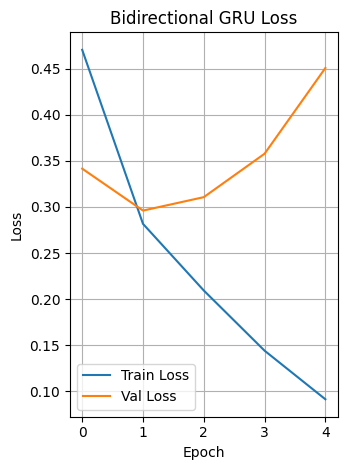

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_bi_gru.history['loss'], label='Train Loss')
plt.plot(history_bi_gru.history['val_loss'], label='Val Loss')
plt.title('Bidirectional GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("bi_gru_training_curves.png")
plt.show()

Evaluation Metrics

In [ ]:
y_pred_bi_gru = (model_bi_gru.predict(X_test_pad) > 0.5).astype("int32")
print("--- Bidirectional GRU Model Classification Report ---")
print(classification_report(y_test_enc, y_pred_bi_gru))

print("✅ Bidirectional GRU model completed: trained, evaluated, and visualized successfully.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step
--- Bidirectional GRU Model Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

✅ Bidirectional GRU model completed: trained, evaluated, and visualized successfully.


Building Bi directional LSTM Model

In [ ]:
def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Training Bidirectional LSTM

In [ ]:
model_bilstm = create_bidirectional_lstm_model()
history_bilstm = model_bilstm.fit(
    X_train_pad,
    y_train_enc,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_enc),
    verbose=2
)

# Save the model
model_bilstm.save("bidirectional_lstm_imdb_model.keras")

Epoch 1/5
625/625 - 281s - 449ms/step - accuracy: 0.8048 - loss: 0.4259 - val_accuracy: 0.8513 - val_loss: 0.3398
Epoch 2/5
625/625 - 273s - 437ms/step - accuracy: 0.8904 - loss: 0.2824 - val_accuracy: 0.8756 - val_loss: 0.3081
Epoch 3/5
625/625 - 275s - 440ms/step - accuracy: 0.9176 - loss: 0.2239 - val_accuracy: 0.8801 - val_loss: 0.2922
Epoch 4/5
625/625 - 329s - 527ms/step - accuracy: 0.9380 - loss: 0.1724 - val_accuracy: 0.8679 - val_loss: 0.3398
Epoch 5/5
625/625 - 315s - 503ms/step - accuracy: 0.9525 - loss: 0.1362 - val_accuracy: 0.8699 - val_loss: 0.4024


Accuracy Plot

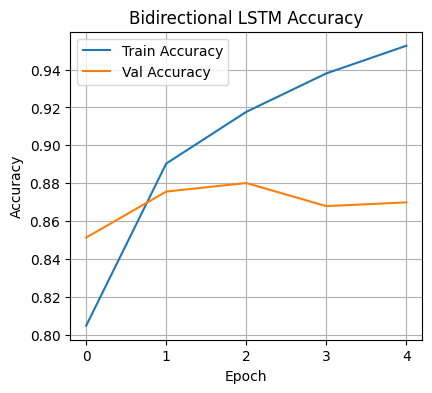

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Val Accuracy')
plt.title('Bidirectional LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Loss Plot

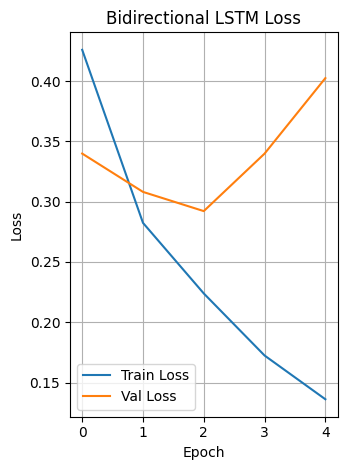

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Val Loss')
plt.title('Bidirectional LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("bilstm_training_curves.png")
plt.show()

Evaluation Metrics

In [ ]:
y_pred_bilstm = (model_bilstm.predict(X_test_pad) > 0.5).astype("int32")
print("--- Bidirectional LSTM Model Classification Report ---")
print(classification_report(y_test_enc, y_pred_bilstm))

print("✅ Bidirectional LSTM model training, evaluation, and visualization completed.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step
--- Bidirectional LSTM Model Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4961
           1       0.90      0.84      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

✅ Bidirectional LSTM model training, evaluation, and visualization completed.


validation Accuracy and Training Accuracy Plots

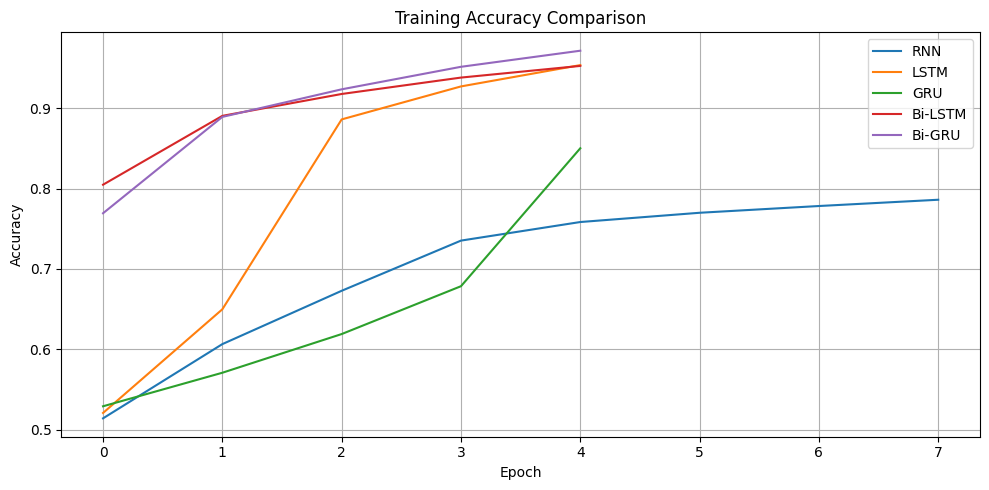

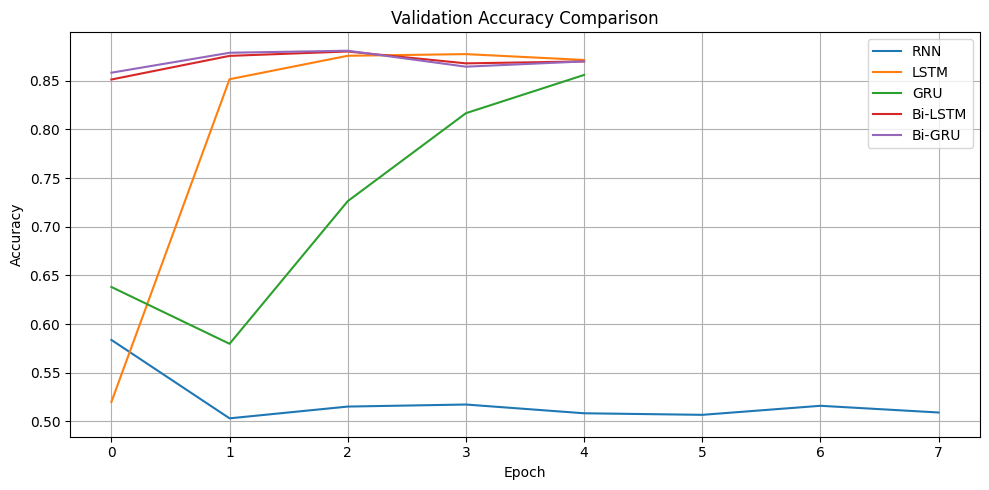

In [ ]:
import matplotlib.pyplot as plt

# Accuracy data from your logs
history_dict = {
    "RNN": {
        "accuracy": [0.5143, 0.6066, 0.6729, 0.7353, 0.7584, 0.7699, 0.7783, 0.7861],
        "val_accuracy": [0.5837, 0.5031, 0.5152, 0.5173, 0.5083, 0.5067, 0.5160, 0.5091]
    },
    "LSTM": {
        "accuracy": [0.5210, 0.6499, 0.8860, 0.9270, 0.9535],
        "val_accuracy": [0.5199, 0.8516, 0.8757, 0.8774, 0.8714]
    },
    "GRU": {
        "accuracy": [0.5293, 0.5710, 0.6191, 0.6786, 0.8501],
        "val_accuracy": [0.6381, 0.5797, 0.7263, 0.8167, 0.8560]
    },
    "Bi-LSTM": {
        "accuracy": [0.8048, 0.8904, 0.9176, 0.9380, 0.9525],
        "val_accuracy": [0.8513, 0.8756, 0.8801, 0.8679, 0.8699]
    },
    "Bi-GRU": {
        "accuracy": [0.7693, 0.8891, 0.9234, 0.9514, 0.9714],
        "val_accuracy": [0.8583, 0.8788, 0.8809, 0.8645, 0.8699]
    }
}

# -------------------- Plot: Training Accuracy --------------------
plt.figure(figsize=(10, 5))
for model_name, history in history_dict.items():
    plt.plot(history["accuracy"], label=f'{model_name}')
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------- Plot: Validation Accuracy --------------------
plt.figure(figsize=(10, 5))
for model_name, history in history_dict.items():
    plt.plot(history["val_accuracy"], label=f'{model_name}')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


